
# 1_1-process-examples.ipynb 


no output


---


**Library Imports**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
from librosa import display

**Amplitudes (wave form, spectogram and sampling rate - freq used during audio recording**

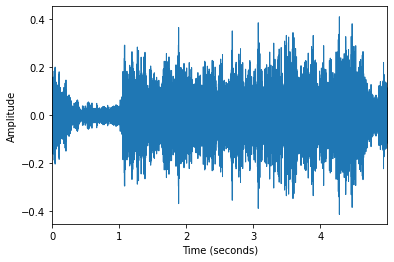

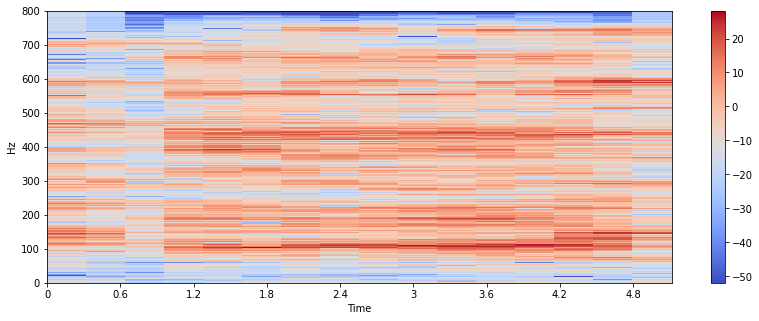

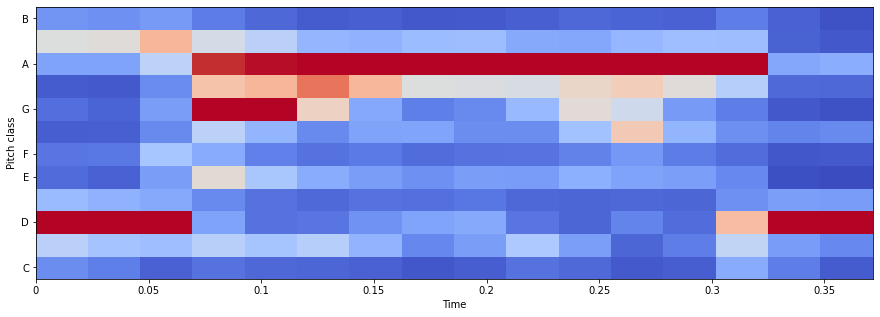

In [0]:
# read in data
file_path = '/content/drive/My Drive/CAPSTONE/data/test.csv'
df_data = pd.read_csv(file_path)
df_data = df_data.drop(columns=['Unnamed: 0'])

test = df_data.head(1)

def extract_samples(song):
  # STEP 1: pull samples from row
  samples = song.drop(columns=['song','sampling_rate','composer','label'])
  samples = samples.to_numpy()
  samples = samples.flatten()
  samples = np.float32(samples)

  # STEP 2: pull sampling rate from row
  sampling_rate = song['sampling_rate']
  sampling_rate = int(sampling_rate)

  return samples, sampling_rate

samples, sampling_rate = extract_samples(test)

def plot_amplitudes(samples, sampling_rate):
 # samples, sampling_rate = extract_samples(song)
  plt.figure()
  librosa.display.waveplot(y = samples,
                           sr = sampling_rate)
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude')
  plt.show();

def plot_stft(samples, sampling_rate):
  R = librosa.stft(samples)
  Xdb = librosa.amplitude_to_db(abs(R))
  plt.figure(figsize=(14,5))
  librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
  plt.colorbar();

def plot_chroma(samples, sampling_rate):
  chromagram = librosa.feature.chroma_stft(samples, sr=sampling_rate)
  plt.figure(figsize=(15, 5))
  librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

def plot_mel(samples, sampling_rate):
  plt.figure(figsize=(10, 4))
  S_dB = librosa.power_to_db(samples, ref=np.max)
  librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='mel', sr=sampling_rate,
                          )
  plt.colorbar(format='%+2.0f dB')
  plt.title('Mel-frequency spectrogram')
  plt.tight_layout()
  plt.show()


plot_amplitudes(samples, sampling_rate)

plot_stft(samples, sampling_rate)

plot_chroma(samples, sampling_rate)

#plot_mel(samples, sampling_rate)